In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("economic_data_20.csv")

In [12]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
0,2020,Jan,2.5,5.3,1100
1,2020,Feb,2.5,5.1,1120
2,2020,Mar,2.4,5.0,1130
3,2020,Apr,2.6,4.9,1140
4,2020,May,2.7,4.8,1150


In [14]:
df.drop(columns=['Year','Month'],axis=1,inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


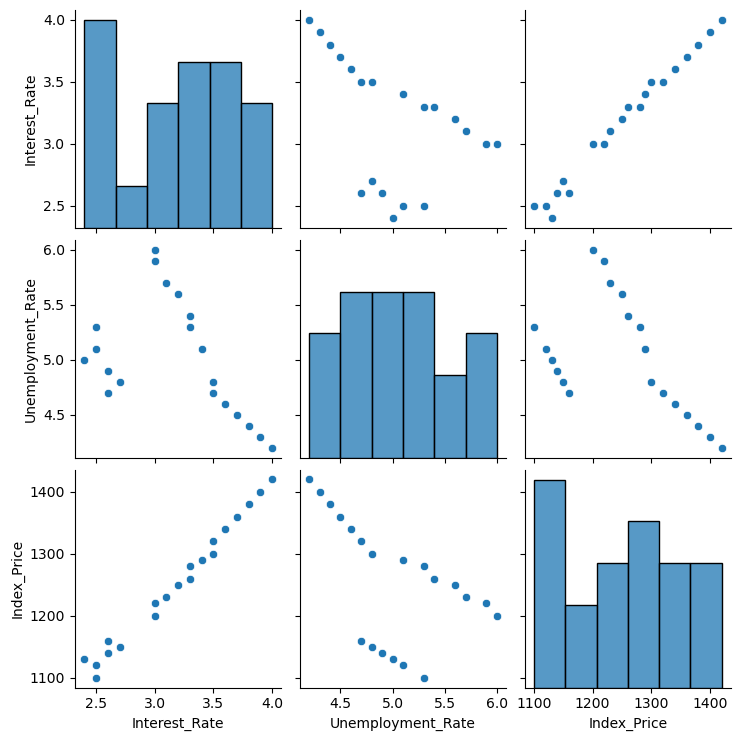

In [16]:
sns.pairplot(df)

In [18]:
df.corr()

,Interest_Rate,Unemployment_Rate,Index_Price
Interest_Rate,1.000000,-0.469245,0.992070
Unemployment_Rate,-0.469245,1.000000,-0.524908
Index_Price,0.992070,-0.524908,1.000000


Text(0, 0.5, 'Unemployment_Rate')

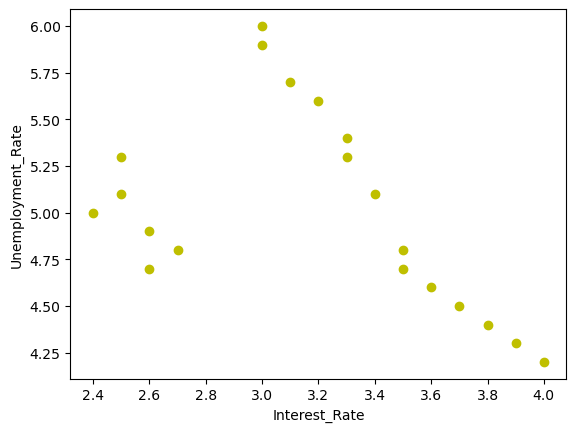

In [24]:
plt.scatter(df['Interest_Rate'],df['Unemployment_Rate'],color='y')
plt.xlabel('Interest_Rate')
plt.ylabel('Unemployment_Rate')

In [26]:
X=df[['Interest_Rate','Unemployment_Rate']]
y=df['Index_Price']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred=model.predict(X_test)

In [42]:
y_pred

array([1138.38045803, 1203.33650138, 1098.00120629, 1116.21552465,
       1268.51442984, 1358.49103504])

In [44]:
from sklearn.model_selection import cross_val_score

In [46]:
scores=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [48]:
scores

array([-132.46433628, -467.46373191, -108.64378303,   -5.69244984,
        -67.74344955])

In [54]:
abs(scores.mean())

156.4015501216002

In [56]:
scores

-156.4015501216002

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [60]:
mse

232.21877426178375

In [62]:
mae

10.681617409634555

In [64]:
rmse

15.23872613645195

In [68]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
Modified_r2 = 1 - (1 - score) * (len(y_test)  - 1) / (len(y_test)  - X_test.shape[1] - 1)


0.9685837058495895


In [70]:
Modified_r2

0.9476395097493159

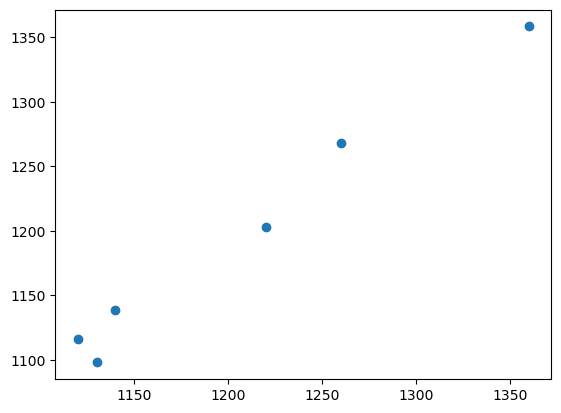

In [72]:
plt.scatter(y_test,y_pred)

In [74]:
residual=y_test-y_pred

In [76]:
residual

3      1.619542
7     16.663499
2     31.998794
1      3.784475
10    -8.514430
16     1.508965
Name: Index_Price, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


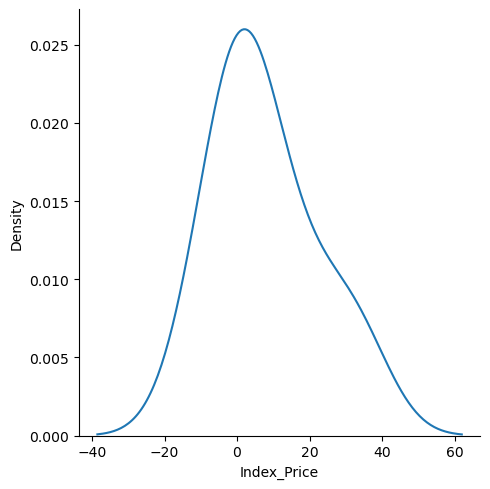

In [78]:
sns.displot(residual,kind='kde')

In [80]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [82]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Index_Price   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.160
Method:                 Least Squares   F-statistic:                            0.03213
Date:                Tue, 07 Jan 2025   Prob (F-statistic):                       0.968
Time:                        20:22:11   Log-Likelihood:                         -119.95
No. Observations:                  14   AIC:                                      243.9
Df Residuals:                      12   BIC:                                      245.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            89.0344    444.540      0.200      0.845    -879.534    1057.603
x2            -6.9790    444.540     -0.016      0.988    -975.548     961.590
==============================================================================
Omnibus:                        0.836   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.048
Skew:                           0.120   Prob(JB):                        0.976
Kurtosis:                       3.155   Cond. No.                         1.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
prediction=model.predict(X_test)

In [86]:
prediction

array([-134.47668483,  -69.52064148, -174.85593656, -156.64161821,
         -4.34271301,   85.63389218])